In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Problem Statement

In [8]:
# we need to predict price by usingvarious parameters
data = pd.read_csv("Automobile_data.csv")
data.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
data['num-of-cylinders'].value_counts()

num-of-cylinders
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

# 1 Encoding

In [11]:
data["num-of-cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [13]:
#Lets see the Lable encoding On this data Cause we have to change this data into int
#lets fit the lableEncoder
#it goes asending to decendic order (a to z)
labelEnc = LabelEncoder()
labelEnc.fit_transform(data["num-of-cylinders"])

array([2, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 5, 2, 2, 2, 2, 2, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 2])

In [16]:
 #example
df_test = pd.DataFrame({"test":['Low','Medium','High','High','Low']})

#High High Low Low Medium Medium  #h come first so it goes on index 0 and so on 
# 0    0    1   1   2      2  


labelEnc.fit_transform(df_test["test"])

array([1, 2, 0, 0, 1])

# OneHot Encoding


In [24]:
df_test = pd.DataFrame({"Test":['Low','High','Meduim','High','High','Low']})

df_new = pd.get_dummies(df_test, columns = ['Test'])
df_new

,Test_High,Test_Low,Test_Meduim
0,False,True,False
1,True,False,False
2,False,False,True
3,True,False,False
4,True,False,False
5,False,True,False


In [27]:
df_new = pd.get_dummies(df_test, columns = ['Test'], prefix = 'test', drop_first = True)
df_new

,test_Low,test_Meduim
0,True,False
1,False,False
2,False,True
3,False,False
4,False,False
5,True,False


In [28]:
df_test

,Test
0,Low
1,High
2,Meduim
3,High
4,High
5,Low


In [29]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [30]:
data.replace("?", np.nan, inplace = True)
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [35]:
#lets drop the unwanted parameter or atributes
data.drop(["make",'fuel-type','aspiration','body-style','num-of-doors','drive-wheels','engine-location','wheel-base'],
          axis =1, inplace= True)


KeyError: "['make', 'fuel-type', 'aspiration', 'body-style', 'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base'] not found in axis"

In [36]:
data

,symboling,normalized-losses,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-type        205 non-null    object 
 7   num-of-cylinders   205 non-null    object 
 8   engine-size        205 non-null    int64  
 9   fuel-system        205 non-null    object 
 10  bore               201 non-null    object 
 11  stroke             201 non-null    object 
 12  compression-ratio  205 non-null    float64
 13  horsepower         203 non-null    object 
 14  peak-rpm           203 non-null    object 
 15  city-mpg           205 non-null    int64  
 16  highway-mpg        205 non

In [39]:
#lets change the data type object into float
data['normalized-losses'] = data['normalized-losses'].astype('float')
data['bore'] = data['bore'].astype('float')
data['stroke'] = data['stroke'].astype('float')
data['horsepower'] = data['horsepower'].astype('float')
data['peak-rpm']= data['peak-rpm'].astype('float')
data['price'] = data['price'].astype("float")


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-type        205 non-null    object 
 7   num-of-cylinders   205 non-null    object 
 8   engine-size        205 non-null    int64  
 9   fuel-system        205 non-null    object 
 10  bore               201 non-null    float64
 11  stroke             201 non-null    float64
 12  compression-ratio  205 non-null    float64
 13  horsepower         203 non-null    float64
 14  peak-rpm           203 non-null    float64
 15  city-mpg           205 non-null    int64  
 16  highway-mpg        205 non

In [42]:
data.drop(['engine-type'], axis = 1, inplace = True)  #cause engine type is in string and not that important

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   num-of-cylinders   205 non-null    object 
 7   engine-size        205 non-null    int64  
 8   fuel-system        205 non-null    object 
 9   bore               201 non-null    float64
 10  stroke             201 non-null    float64
 11  compression-ratio  205 non-null    float64
 12  horsepower         203 non-null    float64
 13  peak-rpm           203 non-null    float64
 14  city-mpg           205 non-null    int64  
 15  highway-mpg        205 non-null    int64  
 16  price              201 non

In [46]:
data.isnull().sum()

symboling             0
normalized-losses    41
length                0
width                 0
height                0
curb-weight           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [47]:
data.drop(["normalized-losses"], axis = 1 , inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   length             205 non-null    float64
 2   width              205 non-null    float64
 3   height             205 non-null    float64
 4   curb-weight        205 non-null    int64  
 5   num-of-cylinders   205 non-null    object 
 6   engine-size        205 non-null    int64  
 7   fuel-system        205 non-null    object 
 8   bore               201 non-null    float64
 9   stroke             201 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         203 non-null    float64
 12  peak-rpm           203 non-null    float64
 13  city-mpg           205 non-null    int64  
 14  highway-mpg        205 non-null    int64  
 15  price              201 non-null    float64
dtypes: float64(9), int64(5), o

In [60]:
data.drop(["fuel-system"],axis =1, inplace = True)
data

,symboling,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [61]:
data.corr()  # value of R = Coeeficient of correlation

,symboling,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.134205,-0.008965,-0.178515,0.071622,0.274573,-0.035823,0.034606,-0.082391
length,-0.357612,1.000000,0.841118,0.491029,0.877728,0.683360,0.607480,0.129739,0.158414,0.555003,-0.287325,-0.670909,-0.704662,0.690628
width,-0.232919,0.841118,1.000000,0.279210,0.867032,0.735433,0.559204,0.182956,0.181129,0.642482,-0.219957,-0.642704,-0.677218,0.751265
height,-0.541038,0.491029,0.279210,1.000000,0.295572,0.067149,0.176195,-0.056999,0.261214,-0.110711,-0.322272,-0.048640,-0.107358,0.135486
curb-weight,-0.227691,0.877728,0.867032,0.295572,1.000000,0.850594,0.649045,0.168929,0.151362,0.751034,-0.266306,-0.757414,-0.797465,0.834415
engine-size,-0.105790,0.683360,0.735433,0.067149,0.850594,1.000000,0.594090,0.206675,0.028971,0.810773,-0.244618,-0.653658,-0.677470,0.872335
bore,-0.134205,0.607480,0.559204,0.176195,0.649045,0.594090,1.000000,-0.055909,0.005203,0.577273,-0.264269,-0.594584,-0.594572,0.543436
stroke,-0.008965,0.129739,0.182956,-0.056999,0.168929,0.206675,-0.055909,1.000000,0.186170,0.090254,-0.071493,-0.042906,-0.044528,0.082310
compression-ratio,-0.178515,0.158414,0.181129,0.261214,0.151362,0.028971,0.005203,0.186170,1.000000,-0.205874,-0.436221,0.324701,0.265201,0.071107
horsepower,0.071622,0.555003,0.642482,-0.110711,0.751034,0.810773,0.577273,0.090254,-0.205874,1.000000,0.130971,-0.803620,-0.770908,0.810533


<Axes: >

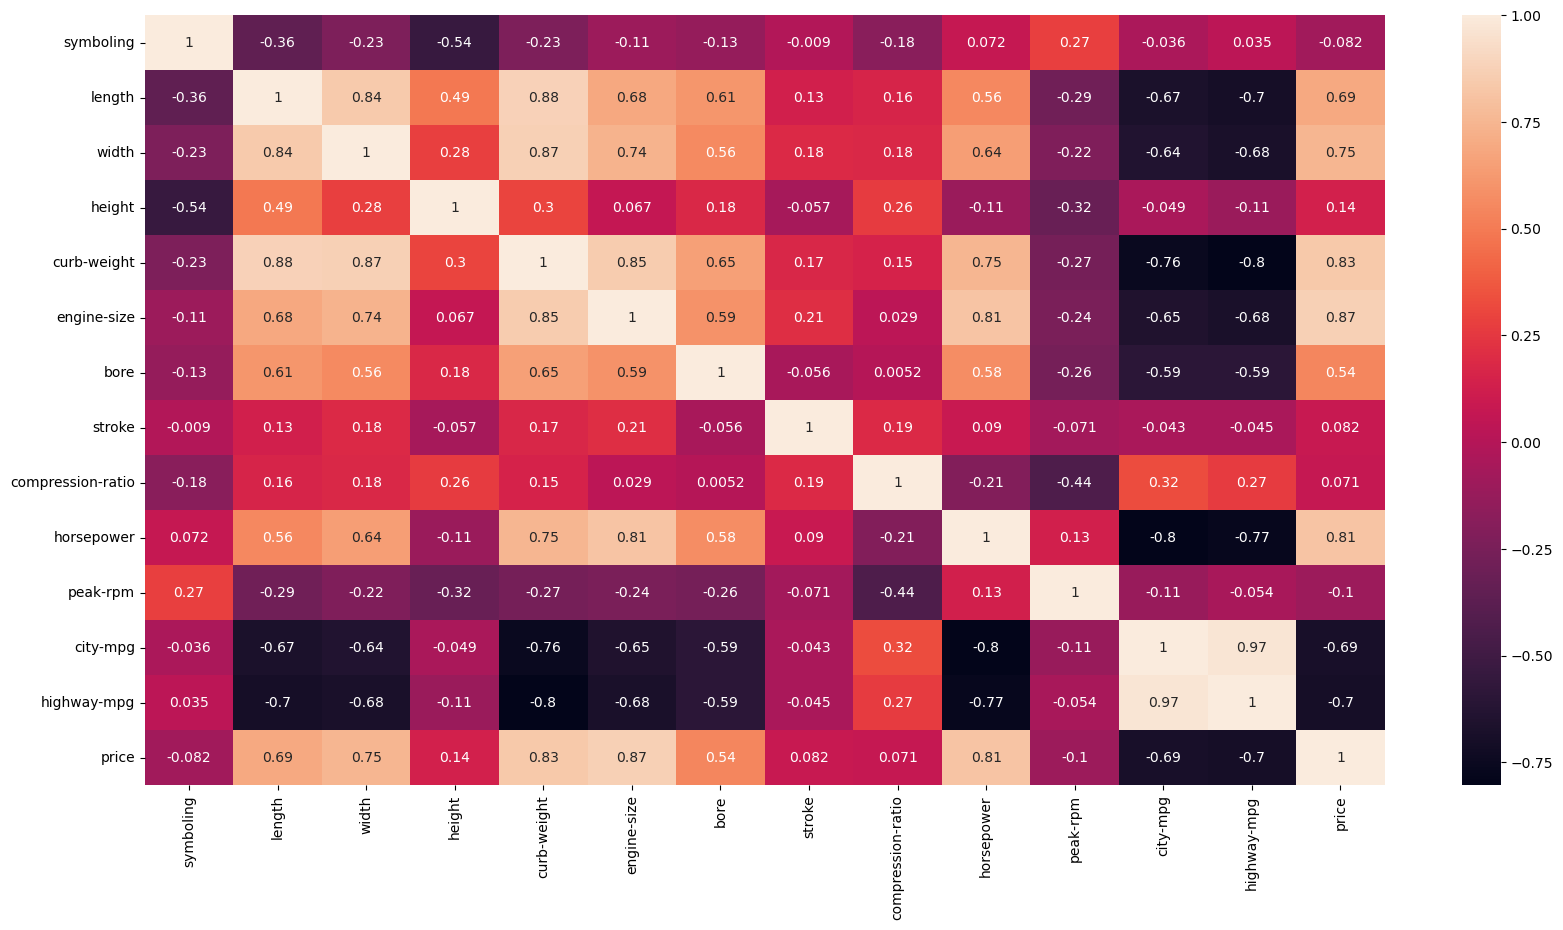

In [63]:
plt.figure(figsize= (20,10))
sns.heatmap(data.corr(), annot = True)

In [65]:
data.drop(['symboling','height','stroke','compression-ratio','peak-rpm'], axis = 1 , inplace = True)


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   length       205 non-null    float64
 1   width        205 non-null    float64
 2   curb-weight  205 non-null    int64  
 3   engine-size  205 non-null    int64  
 4   bore         201 non-null    float64
 5   horsepower   203 non-null    float64
 6   city-mpg     205 non-null    int64  
 7   highway-mpg  205 non-null    int64  
 8   price        201 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 14.5 KB


In [67]:
# lets Check missing values
data.isna().sum()

length         0
width          0
curb-weight    0
engine-size    0
bore           4
horsepower     2
city-mpg       0
highway-mpg    0
price          4
dtype: int64

In [68]:
data['bore'] = data['bore'].fillna(data['bore'].median())
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())
data['price'] = data['price'].fillna(data['price'].median())

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   length       205 non-null    float64
 1   width        205 non-null    float64
 2   curb-weight  205 non-null    int64  
 3   engine-size  205 non-null    int64  
 4   bore         205 non-null    float64
 5   horsepower   205 non-null    float64
 6   city-mpg     205 non-null    int64  
 7   highway-mpg  205 non-null    int64  
 8   price        205 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 14.5 KB


In [71]:
data.isnull().sum()

length         0
width          0
curb-weight    0
engine-size    0
bore           0
horsepower     0
city-mpg       0
highway-mpg    0
price          0
dtype: int64

In [72]:
data.isna().sum()

length         0
width          0
curb-weight    0
engine-size    0
bore           0
horsepower     0
city-mpg       0
highway-mpg    0
price          0
dtype: int64

# Model Training    

# Train Test split

In [74]:
x = data.drop(['price'], axis = 1)
y = data['price']

In [80]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1 )
x_train.shape

(164, 8)

In [77]:
y_test.shape

(41,)

In [78]:
x_test.shape

(41, 8)

In [81]:
y_train.shape

(164,)

# Model Training

In [82]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

# Evaluation

In [83]:
# unseen data .. Data rest for testing 
y_pred = linear_model.predict(x_test)
y_pred      #y Predicted

array([ 6692.46692484,  6968.58115437,  6391.30145391,  4970.11558759,
        9340.38618121, 23522.75937852,  6967.7123477 , -1727.31916891,
        6340.51808668, 12062.37161258, 16358.12118523, 15742.80328413,
       15840.00307862, 10157.26589046, 17812.02173753, 15141.52821618,
       10094.05727677,  7145.21959309, 13399.59699079, 10427.52224124,
       11637.70428566,  6300.67549573, 10139.64698038,  8632.85933232,
       14881.51737598,  7177.72094812, 18058.04324084,  6762.86769193,
        6175.19409153,  7187.70345071,  7863.75157088, 12078.10983982,
       25892.09147415, 13664.30706258, 17309.0014136 ,  6756.77368787,
        8760.83341773, 34068.82751176,  8618.194539  , 17009.45028732,
        6518.76688233])

In [84]:
y_test   # y Actual

78      6669.0
97      7999.0
151     6338.0
44     10295.0
40     10295.0
67     25552.0
98      8249.0
18      5151.0
152     6488.0
62     10245.0
4      17450.0
172    17669.0
197    16515.0
38      9095.0
29     12964.0
170    11199.0
190     9980.0
33      6529.0
136    18150.0
145    11259.0
173     8948.0
31      6855.0
11     16925.0
119     7957.0
169     9989.0
34      7129.0
84     14489.0
184     7995.0
120     6229.0
35      7295.0
163     8058.0
28      8921.0
16     41315.0
130     9295.0
116    17950.0
182     7775.0
27      8558.0
47     32250.0
58     15645.0
204    22625.0
138     5118.0
Name: price, dtype: float64

In [85]:
y_test - y_pred

78       -23.466925
97      1030.418846
151      -53.301454
44      5324.884412
40       954.613819
67      2029.240621
98      1281.287652
18      6878.319169
152      147.481913
62     -1817.371613
4       1091.878815
172     1926.196716
197      674.996921
38     -1062.265890
29     -4848.021738
170    -3942.528216
190     -114.057277
33      -616.219593
136     4750.403009
145      831.477759
173    -2689.704286
31       554.324504
11      6785.353020
119     -675.859332
169    -4892.517376
34       -48.720948
84     -3569.043241
184     1232.132308
120       53.805908
35       107.296549
163      194.248429
28     -3157.109840
16     15422.908526
130    -4369.307063
116      640.998586
182     1018.226312
27      -202.833418
47     -1818.827512
58      7026.805461
204     5615.549713
138    -1400.766882
Name: price, dtype: float64

In [86]:
data_residual = pd.DataFrame()
data_residual['Residuals'] = y_test - y_pred
data_residual

,Residuals
78,-23.466925
97,1030.418846
151,-53.301454
44,5324.884412
40,954.613819
67,2029.240621
98,1281.287652
18,6878.319169
152,147.481913
62,-1817.371613


<Axes: xlabel='Residuals', ylabel='Density'>

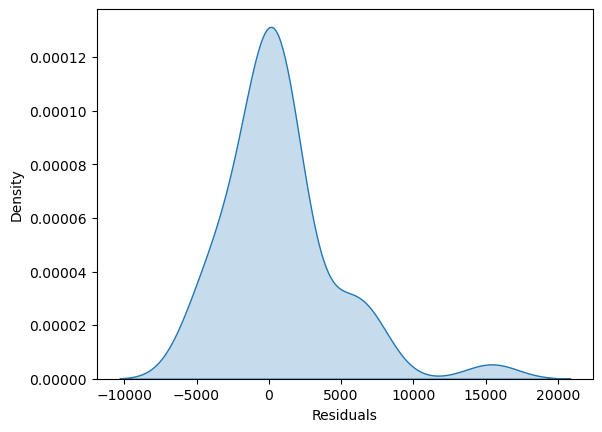

In [89]:
#Normality

sns.kdeplot(data_residual['Residuals'], fill = True)

<Axes: ylabel='Residuals'>

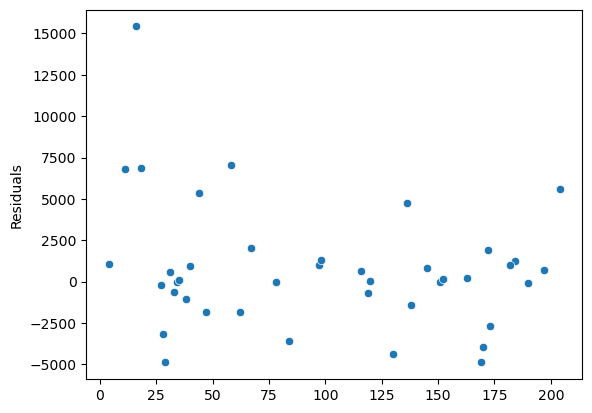

In [94]:
sns.scatterplot(data_residual['Residuals'])

In [96]:
mse = mean_squared_error (y_test, y_pred)
mse

14702213.740797821

In [98]:
rmse = np.sqrt(mse)
rmse

3834.3465858993263

In [99]:
mean_absolute_error(y_test, y_pred)


2460.3602822493226

In [100]:
r2_score(y_test, y_pred)  # Good model  End of the model

0.7316061408397294

In [101]:
#for understandig
m_values = linear_model.coef_
m_values

array([   -7.44101273,   343.22092143,     2.03133469,   118.09044848,
       -1241.80140657,    -1.67412463,   -21.62022731,  -145.74793732])

In [114]:
# not need but for understanding

for i, feature_name in enumerate(x.columns):
    print(feature_name)
    print(f'Coeficent of {feature_name} is {round(m_values[i],3)}')

length
Coeficent of length is -7.441
width
Coeficent of width is 343.221
curb-weight
Coeficent of curb-weight is 2.031
engine-size
Coeficent of engine-size is 118.09
bore
Coeficent of bore is -1241.801
horsepower
Coeficent of horsepower is -1.674
city-mpg
Coeficent of city-mpg is -21.62
highway-mpg
Coeficent of highway-mpg is -145.748


In [103]:
linear_model.intercept_

-19164.965772194766